# Quick Exploration

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

%load_ext sql_magic
%matplotlib inline

In [3]:
new_articles = pd.read_csv("../../data/processed/query_results/content_quality/final_frame_updated_pv_topcs.csv", sep=',', encoding = 'utf-8', parse_dates=True) 
interim = pd.read_csv("../../data/processed/query_results/content_quality/interim_frame_updated.csv", sep=',', encoding = 'utf-8', parse_dates=True)

In [6]:
new_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7447 entries, 0 to 7446
Data columns (total 36 columns):
wikicode             7447 non-null object
page_title           7447 non-null object
url                  7447 non-null object
url_article_info     7447 non-null object
page_id              7447 non-null float64
at_edits             7447 non-null object
translation_tool     7447 non-null bool
QID                  7447 non-null object
iwsitelinks          7447 non-null float64
iwsites              7447 non-null object
article_type         7447 non-null object
page_len             7447 non-null float64
relative_page_len    7447 non-null float64
total_edits          7447 non-null float64
editors              7447 non-null float64
views_1M             7447 non-null float64
views_1M_all         7447 non-null float64
editors_1stM         7447 non-null float64
edits_1M             7447 non-null float64
minor_edits          7447 non-null float64
major_editors        7447 non-null float64
I

In [7]:
interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 14 columns):
wikicode             8863 non-null object
page_id              8863 non-null float64
page_title           8863 non-null object
page_len             8863 non-null float64
relative_page_len    8863 non-null float64
at_edits             8863 non-null object
QID                  8863 non-null float64
first_edited         8863 non-null object
article_type         8863 non-null object
translation_tool     8863 non-null bool
url                  8863 non-null object
url_article_info     8863 non-null object
views_1M             8863 non-null float64
views_1M_all         8863 non-null float64
dtypes: bool(1), float64(6), object(7)
memory usage: 908.9+ KB


In [ ]:
## exploratory analysis

In [8]:
new_articles.describe()

,page_id,iwsitelinks,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,edits_1M,...,IP_editors,micro_editors,revertrate,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links,pl1_score,pl2_score
count,7.447000e+03,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,...,7447.000000,7447.000000,7447.0,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000,7447.000000
mean,4.611372e+05,23.386062,11837.564791,0.244831,7.841144,2.071841,10.728078,37.361354,1.337720,7.878475,...,0.013965,0.963207,0.0,0.943870,1.130657,18.839130,8.752652,7.862361,0.838174,0.721720
std,3.204643e+05,34.561769,7277.651458,0.240546,7.197075,1.192158,48.433681,91.884482,0.622313,7.103670,...,0.164115,0.906294,0.0,0.830403,0.535833,30.608028,9.461206,23.344913,0.323906,0.382791
min,3.632000e+03,0.000000,366.000000,0.009660,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.234155e+05,3.000000,8209.500000,0.103495,4.000000,1.000000,0.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,6.000000,3.000000,0.000000,0.907322,0.637041
50%,4.634890e+05,8.000000,10645.000000,0.151828,6.000000,2.000000,1.000000,8.000000,1.000000,6.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,11.000000,7.000000,1.000000,0.987578,0.928419
75%,8.060390e+05,32.000000,13717.500000,0.280630,10.000000,3.000000,5.000000,24.000000,2.000000,10.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,20.000000,11.000000,4.000000,0.998255,0.991694
max,1.124778e+06,1057.000000,211451.000000,1.000000,202.000000,16.000000,1269.000000,1884.000000,8.000000,121.000000,...,9.000000,6.000000,0.0,32.000000,9.000000,589.000000,185.000000,906.000000,1.000010,1.000010


In [9]:
interim.describe()

,page_id,page_len,relative_page_len,QID,views_1M,views_1M_all
count,8.863000e+03,8863.000000,8863.000000,8.863000e+03,8863.000000,8863.000000
mean,4.127637e+05,12758.483922,0.247730,8.430302e+06,29.618526,72.658129
std,3.237508e+05,8671.881363,0.233403,1.654171e+07,162.708724,277.769040
min,5.820000e+02,366.000000,0.009660,0.000000e+00,0.000000,0.000000
25%,1.215890e+05,8585.500000,0.109016,2.314015e+05,0.000000,4.000000
50%,4.595530e+05,11109.000000,0.159322,2.418927e+06,2.000000,10.000000
75%,7.993185e+05,14549.000000,0.287146,6.974085e+06,8.000000,37.000000
max,1.124778e+06,218860.000000,1.000000,8.600728e+07,4890.000000,9389.000000


In [ ]:
na_agg = new_articles[[ #for aggregating
'wikicode',
'iwsitelinks',
'article_type',
'page_len',
'relative_page_len',
'total_edits',
'editors',
'views_1M',
'views_1M_all',
'editors_1stM',
'edits_1M',
'minor_edits',
'major_editors',
'IP_editors',
'micro_editors',
'revertrate',
'first_edited',
'last_edited',
'talk_page_edits',
'watch_count',
'o_internal_links',
'o_external_links',
'incoming_links']]

#select only numeric columns for hist plotting
numerics = ['int', 'float64']
na_numeric = new_articles.select_dtypes(include=numerics)

In [124]:
na_agg.groupby(['wikicode']).agg(['nunique'])

,iwsitelinks,article_type,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,edits_1M,...,IP_editors,micro_editors,revertrate,first_edited,last_edited,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links
,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,...,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique,nunique
wikicode,,,,,,,,,,,,,,,,,,,,,
aswiki,88,1,173,173,29,4,59,85,4,30,...,3,3,1,67,77,4,3,55,34,56
bnwiki,68,1,971,971,41,9,69,184,5,39,...,3,6,1,94,111,10,8,105,47,84
guwiki,65,1,143,143,21,5,81,119,4,19,...,2,4,1,68,71,7,4,36,35,24
hiwiki,52,1,190,190,25,5,125,159,3,22,...,3,5,1,68,61,2,4,60,32,27
knwiki,37,1,136,130,34,5,42,66,5,33,...,2,4,1,34,36,3,4,26,26,11
mlwiki,89,1,187,187,29,5,28,44,4,27,...,2,4,1,68,73,4,3,68,52,14
mrwiki,41,1,83,83,23,5,43,57,4,21,...,2,4,1,47,32,2,4,38,21,17
orwiki,84,1,126,125,25,5,13,38,3,25,...,2,6,1,73,49,4,2,16,39,12


In [123]:
na_agg.groupby(['wikicode']).agg(['median', 'max'])

iwsitelinks         page_len           relative_page_len            \
              median     max   median       max            median       max   
wikicode                                                                      
aswiki          30.0   277.0  11782.0   54259.0          0.122673  0.564939   
bnwiki           5.0  1057.0  11642.5   57514.0          0.076433  0.377579   
guwiki          11.5   223.0  12937.5   34624.0          0.287076  0.768287   
hiwiki           5.0   147.0  10544.0  146014.0          0.116047  1.000000   
knwiki           0.0   120.0  16463.0  211451.0          0.435437  1.000000   
mlwiki          44.0   258.0  15577.0   55640.0          0.133744  0.477726   
mrwiki          10.0   147.0   9929.5   44149.0          0.147495  0.655798   
orwiki          62.0   270.0   9801.5   24546.0          0.438948  1.000000   
pawiki          10.0   191.0   8563.5   41302.0          0.293321  1.000000   
satwiki         28.0   544.0   8880.0   55277.0          1.000000  1.000000   
sawiki           8.0    20.0  11811.0   40530.0          0.423911  1.000000   
tawiki           9.0   149.0  12275.5   86020.0          0.137720  0.965064   
tcywiki          0.0   229.0  10521.0   20445.0          1.000000  1.000000   
tewiki          11.5    79.0  17648.5   42605.0          0.463179  1.000000   
urwiki           6.0   133.0   5404.0  179564.0          0.083453  1.000000   

         total_edits        editors        ... talk_page_edits        \
              median    max  median   max  ...          median   max   
wikicode                                   ...                         
aswiki           8.0   54.0     2.0   4.0  ...             1.0   4.0   
bnwiki           8.0  107.0     3.0  16.0  ...             1.0  14.0   
guwiki           7.0   39.0     2.0   5.0  ...             1.0   8.0   
hiwiki           5.0   38.0     2.0   5.0  ...             1.0   1.0   
knwiki           5.0  202.0     1.0   5.0  ...             0.0   2.0   
mlwiki          14.0   32.0     2.0   5.0  ...             1.0   3.0   
mrwiki           5.0   69.0     2.0   5.0  ...             0.0   1.0   
orwiki           8.0   28.0     2.0   5.0  ...             1.0   4.0   
pawiki           4.0   30.0     1.0   4.0  ...             0.0   5.0   
satwiki          8.0   54.0     1.0   4.0  ...             1.0   2.0   
sawiki           6.5   35.0     1.0   4.0  ...             0.0   0.0   
tawiki           6.0   79.0     2.0   7.0  ...             1.0  32.0   
tcywiki         20.0   50.0     3.0   8.0  ...             0.0   1.0   
tewiki          17.5   44.0     2.0   4.0  ...             0.0   4.0   
urwiki           5.0  127.0     2.0  10.0  ...             1.0   5.0   

         watch_count      o_internal_links        o_external_links         \
              median  max           median    max           median    max   
wikicode                                                                    
aswiki           1.0  2.0             11.0  201.0              5.0   84.0   
bnwiki           2.0  8.0             29.0  201.0              9.0  111.0   
guwiki           2.0  4.0             10.5   83.0              9.0   70.0   
hiwiki           1.0  4.0             15.0  303.0              8.0   75.0   
knwiki           1.0  3.0              4.0   68.0              6.0   79.0   
mlwiki           1.0  2.0             21.0  160.0             17.0  185.0   
mrwiki           1.0  3.0              7.0  291.0              7.0   44.0   
orwiki           1.0  2.0              4.0   55.0              8.0   82.0   
pawiki           1.0  2.0              7.0   54.0              6.0   69.0   
satwiki          1.0  2.0              3.0   51.0              7.0   64.0   
sawiki           1.0  1.0             12.5   25.0              4.5   17.0   
tawiki           1.0  6.0             12.0  193.0              7.0  119.0   
tcywiki          1.0  2.0              1.5   10.0              2.0    4.0   
tewiki           1.0  2.0              2.5   22.0        

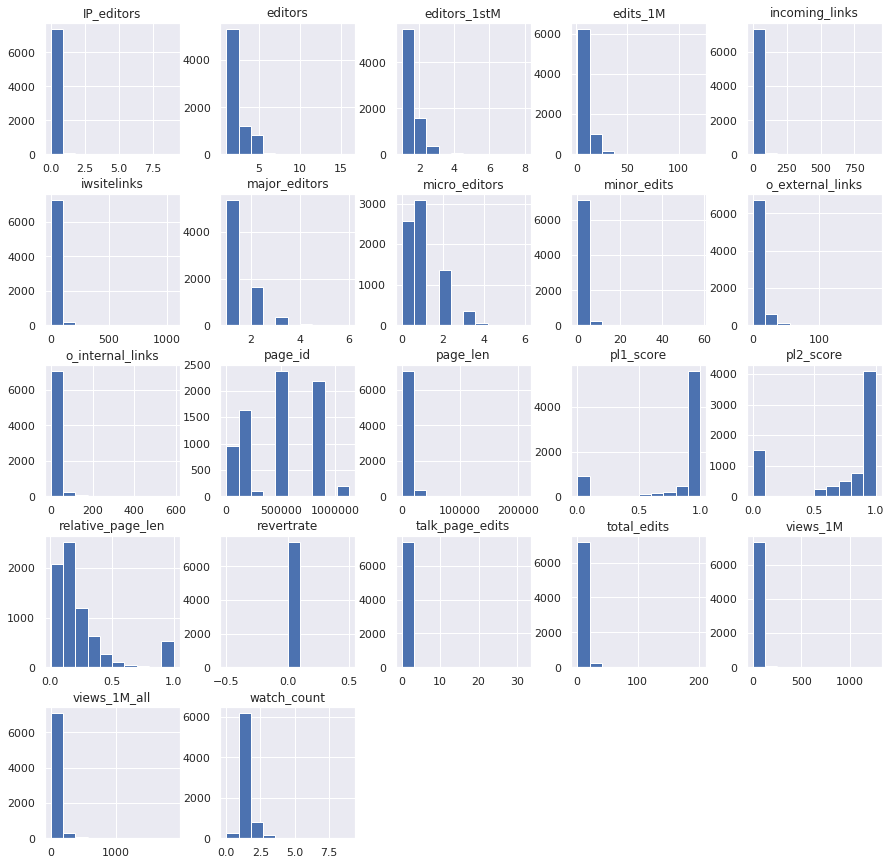

In [109]:
na_numeric.hist(figsize=(15,15));

In [110]:
new_articles.corr()

,page_id,translation_tool,iwsitelinks,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,...,IP_editors,micro_editors,revertrate,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links,pl1_score,pl2_score
page_id,1.000000,-0.261001,-0.209006,0.008665,-0.615344,0.051295,0.504902,0.117334,0.173974,0.069809,...,0.011073,0.486171,NaN,0.413988,0.151869,0.298573,-0.011895,0.206378,-0.026821,-0.040323
translation_tool,-0.261001,1.000000,-0.018813,-0.007219,-0.076493,-0.233692,-0.235503,-0.030796,-0.028838,-0.101247,...,-0.033245,-0.265220,NaN,-0.256563,-0.069020,-0.155781,-0.015197,-0.183351,0.162348,0.127112
iwsitelinks,-0.209006,-0.018813,1.000000,0.019431,0.080778,0.039729,-0.057874,-0.007271,-0.004716,0.037865,...,0.000233,0.003828,NaN,-0.012675,-0.005371,-0.067106,0.103933,-0.011080,0.110276,-0.015599
page_len,0.008665,-0.007219,0.019431,1.000000,0.216926,0.226569,0.122038,0.143374,0.182979,0.131575,...,0.033744,0.018840,NaN,0.060626,0.083739,0.144816,0.506931,0.023972,0.001620,0.028642
relative_page_len,-0.615344,-0.076493,0.080778,0.216926,1.000000,0.066503,-0.315843,-0.034098,-0.083492,-0.101381,...,0.016704,-0.278829,NaN,-0.192346,-0.100105,-0.164216,0.143352,-0.144832,-0.064562,-0.010726
total_edits,0.051295,-0.233692,0.039729,0.226569,0.066503,1.000000,0.314195,0.078779,0.111973,0.248926,...,0.128544,0.296626,NaN,0.133135,0.139494,0.107231,0.191165,0.052145,-0.016263,-0.017363
editors,0.504902,-0.235503,-0.057874,0.122038,-0.315843,0.314195,1.000000,0.057614,0.129618,0.620244,...,0.199427,0.684236,NaN,0.313380,0.335142,0.206760,0.078637,0.205665,0.090360,0.075033
views_1M,0.117334,-0.030796,-0.007271,0.143374,-0.034098,0.078779,0.057614,1.000000,0.808109,0.071545,...,0.120507,0.042120,NaN,0.022808,0.077036,0.058106,0.060982,0.014928,-0.016153,-0.028864
views_1M_all,0.173974,-0.028838,-0.004716,0.182979,-0.083492,0.111973,0.129618,0.808109,1.000000,0.105396,...,0.113539,0.086124,NaN,0.083293,0.162292,0.066386,0.071350,0.023482,0.003660,-0.013336
editors_1stM,0.069809,-0.101247,0.037865,0.131575,-0.101381,0.248926,0.620244,0.071545,0.105396,1.000000,...,0.040603,0.275396,NaN,0.136742,0.277255,0.053195,0.069435,0.065673,0.036327,0.030164


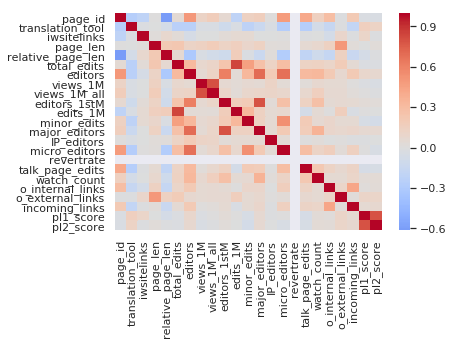

In [114]:
corr = new_articles.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="coolwarm", center=0);

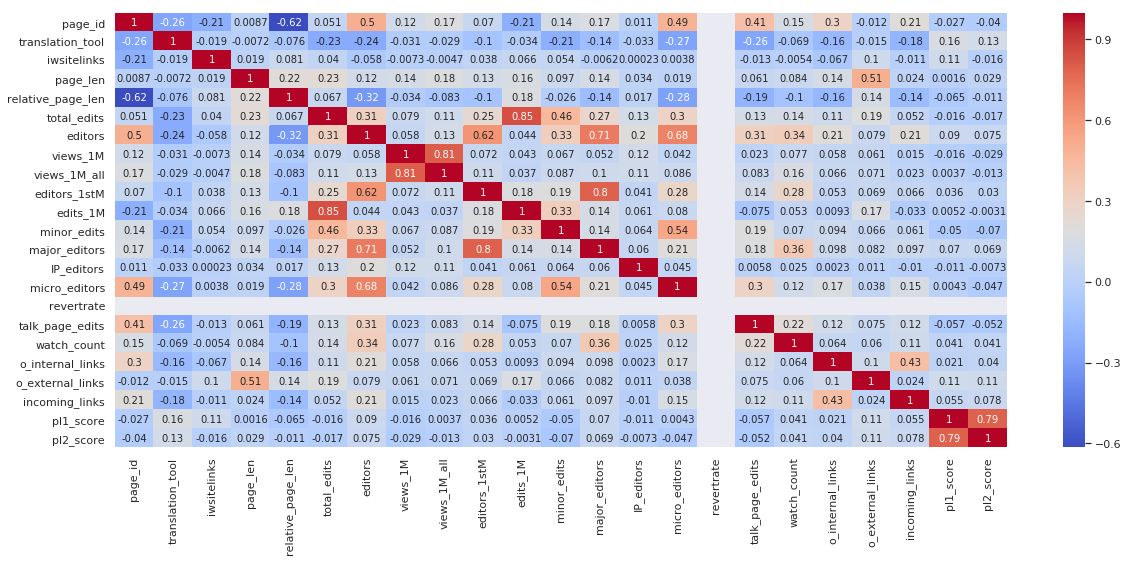

In [113]:
plt.figure(figsize = (20,8))
sns.heatmap(new_articles.corr(), annot=True, cmap='coolwarm')

## Isolated/Underdeveloped articles

In [5]:
#o_internal_links	o_external_links
zero_oel = new_articles[new_articles['o_internal_links']==0]
zero_oil = new_articles[new_articles['o_external_links']==0]

len(new_articles[new_articles['o_internal_links']==0])

228

In [6]:
len(new_articles[new_articles['o_external_links']==0])

540

In [7]:
orphans_mask = (new_articles['o_internal_links']== 0) & (new_articles['o_external_links'] == 0)
orphans = new_articles.loc[orphans_mask]

In [10]:
orphans.wikicode.unique()

array(['pawiki', 'tawiki', 'tcywiki', 'knwiki', 'urwiki', 'satwiki'],
      dtype=object)

In [11]:
len(orphans)

75

In [12]:
orphans.describe()

,page_id,iwsitelinks,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,edits_1M,...,IP_editors,micro_editors,revertrate,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links,pl1_score,pl2_score
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.0,75.000000,75.000000,75.0,75.0,75.000000,75.000000,75.000000
mean,676604.480000,13.506667,10958.013333,0.312989,4.813333,2.173333,1.866667,16.746667,1.386667,3.866667,...,0.053333,0.973333,0.0,1.386667,1.000000,0.0,0.0,2.986667,0.249957,0.188610
std,360916.914552,33.405119,24642.372186,0.374795,6.343103,1.266761,3.330179,26.894234,0.695416,5.909985,...,0.226210,0.972227,0.0,0.590312,0.328798,0.0,0.0,6.556394,0.409999,0.369031
min,6631.000000,0.000000,366.000000,0.012536,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,872110.000000,0.000000,4504.500000,0.069562,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000
50%,874411.000000,2.000000,6366.000000,0.110478,3.000000,2.000000,0.000000,7.000000,1.000000,2.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,878390.500000,5.500000,9182.500000,0.289267,6.500000,3.000000,2.000000,22.500000,2.000000,5.000000,...,0.000000,2.000000,0.0,2.000000,1.000000,0.0,0.0,3.000000,0.640575,0.000000
max,881402.000000,171.000000,211451.000000,1.000000,50.000000,6.000000,16.000000,207.000000,4.000000,46.000000,...,1.000000,4.000000,0.0,2.000000,2.000000,0.0,0.0,51.000000,1.000010,1.000010


In [14]:
zero_oel.describe()

,page_id,iwsitelinks,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,edits_1M,...,IP_editors,micro_editors,revertrate,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links,pl1_score,pl2_score
count,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,...,228.000000,228.000000,228.0,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000
mean,4.051370e+05,23.451754,10725.846491,0.430080,6.885965,1.929825,8.201754,22.842105,1.377193,6.504386,...,0.030702,0.833333,0.0,0.986842,1.035088,0.0,4.245614,1.837719,0.580270,0.474920
std,3.804724e+05,49.965824,14820.435361,0.393889,6.840871,1.166487,49.334635,67.169400,0.662266,7.292805,...,0.172888,0.904386,0.0,0.699152,0.361831,0.0,4.865706,4.533282,0.469098,0.473213
min,6.145000e+03,0.000000,366.000000,0.012536,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,7.879500e+03,0.000000,6354.500000,0.097488,3.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.0,0.750000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2.503450e+05,4.000000,8408.000000,0.221282,5.000000,2.000000,1.000000,6.000000,1.000000,4.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,0.0,3.000000,1.000000,0.899096,0.611386
75%,8.743758e+05,29.250000,11499.250000,1.000000,9.000000,3.000000,3.250000,19.000000,2.000000,8.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,0.0,7.000000,2.000000,0.995940,0.982160
max,1.107858e+06,544.000000,211451.000000,1.000000,50.000000,6.000000,703.000000,838.000000,4.000000,46.000000,...,1.000000,4.000000,0.0,2.000000,3.000000,0.0,38.000000,51.000000,1.000010,1.000010


In [15]:
zero_oil.describe()

,page_id,iwsitelinks,page_len,relative_page_len,total_edits,editors,views_1M,views_1M_all,editors_1stM,edits_1M,...,IP_editors,micro_editors,revertrate,talk_page_edits,watch_count,o_internal_links,o_external_links,incoming_links,pl1_score,pl2_score
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.0,540.000000,540.000000,540.000000,540.0,540.000000,540.000000,540.000000
mean,565268.648148,18.794444,8787.922222,0.239050,5.861111,2.005556,3.538889,18.729630,1.266667,5.766667,...,0.022222,0.983333,0.0,1.127778,1.079630,22.644444,0.0,5.874074,0.596960,0.461811
std,365719.757145,29.517901,10392.387284,0.266192,5.339075,1.114072,12.080757,42.630016,0.550931,5.494237,...,0.170850,0.928671,0.0,0.765905,0.389033,72.513139,0.0,26.375181,0.457842,0.448671
min,6219.000000,0.000000,366.000000,0.009660,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,123508.750000,2.000000,5609.250000,0.084835,3.000000,1.000000,0.000000,4.000000,1.000000,2.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,3.000000,0.0,0.000000,0.000000,0.000000
50%,872728.500000,4.000000,7206.500000,0.130422,5.000000,2.000000,1.000000,8.000000,1.000000,4.000000,...,0.000000,1.000000,0.0,1.000000,1.000000,6.000000,0.0,1.000000,0.903296,0.573684
75%,876385.250000,29.250000,9330.500000,0.251340,7.000000,3.000000,3.000000,17.000000,1.000000,7.250000,...,0.000000,2.000000,0.0,2.000000,1.000000,14.000000,0.0,4.250000,0.993106,0.938581
max,881412.000000,171.000000,211451.000000,1.000000,50.000000,7.000000,154.000000,600.000000,4.000000,46.000000,...,2.000000,4.000000,0.0,4.000000,6.000000,488.000000,0.0,521.000000,1.000010,1.000010


### Translation Tool Use

In [12]:
new_articles[new_articles['translation_tool']==True].groupby(['wikicode'])['relative_page_len'].mean().reset_index()

,wikicode,relative_page_len
0,aswiki,0.196658
1,bnwiki,0.108262
2,guwiki,0.292864
3,hiwiki,0.176201
4,knwiki,0.464725
5,mlwiki,0.163820
6,mrwiki,0.403351
7,orwiki,0.537361
8,pawiki,0.320764
9,tawiki,0.145949


In [13]:
interim.groupby('article_type').count()

,wikicode,page_id,page_title,page_len,relative_page_len,at_edits,QID,first_edited,translation_tool,url,url_article_info,views_1M,views_1M_all
article_type,,,,,,,,,,,,,
expanded,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418,1418
new,7445,7445,7445,7445,7445,7445,7445,7445,7445,7445,7445,7445,7445


In [125]:
print(interim.groupby('article_type')['translation_tool'].sum().astype(int))

article_type
expanded     113
new         3602
Name: translation_tool, dtype: int64


In [126]:
new_mask = interim[interim.article_type == 'new']
exp_mask = interim[interim.article_type == 'expanded']

In [127]:
new_t_count = new_mask[new_mask.translation_tool == True].shape[0]
exp_t_count = exp_mask[exp_mask.translation_tool == True].shape[0]

In [128]:
new_articles_count = new_mask.shape[0]
exp_articles_count = exp_mask.shape[0]
total_articles = len(interim)

In [129]:
def percentage(part, whole):
  return 100 * float(part)/float(whole)

In [130]:
expanded_translation_percent = percentage(exp_t_count, exp_articles_count)
expanded_translation_percent

7.968970380818053

In [131]:
new_translation_percent = percentage(new_t_count, new_articles_count)
new_translation_percent

48.381464069845535

### Topics

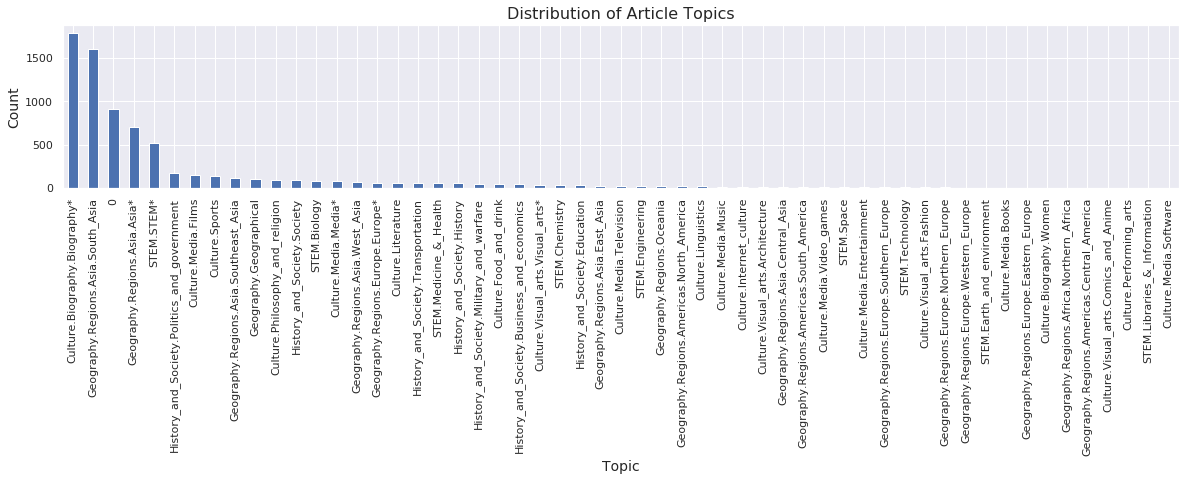

In [39]:
#discover which topics are most represented
new_articles['predicted_label_1'].value_counts().plot(kind='bar', figsize=(20,3))
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Article Topics',fontsize=16)

plt.show;

In [104]:
new_articles['predicted_label_1'].value_counts().nlargest(30)

Culture.Biography.Biography*                   1793
Geography.Regions.Asia.South_Asia              1605
0                                               913
Geography.Regions.Asia.Asia*                    703
STEM.STEM*                                      522
History_and_Society.Politics_and_government     176
Culture.Media.Films                             150
Culture.Sports                                  143
Geography.Regions.Asia.Southeast_Asia           109
Geography.Geographical                          107
Culture.Philosophy_and_religion                  95
History_and_Society.Society                      86
STEM.Biology                                     80
Culture.Media.Media*                             76
Geography.Regions.Asia.West_Asia                 67
Geography.Regions.Europe.Europe*                 61
Culture.Literature                               58
History_and_Society.Transportation               56
STEM.Medicine_&_Health                           55
History_and_

In [42]:
#create a list of top 25 topics to get a better view of those
top_25_topics_list = list(new_articles['predicted_label_1'].value_counts().nlargest(25).index)

In [62]:
top_25_topics = new_articles['predicted_label_1'].value_counts().nlargest(25).rename_axis('topics').reset_index(name='counts')

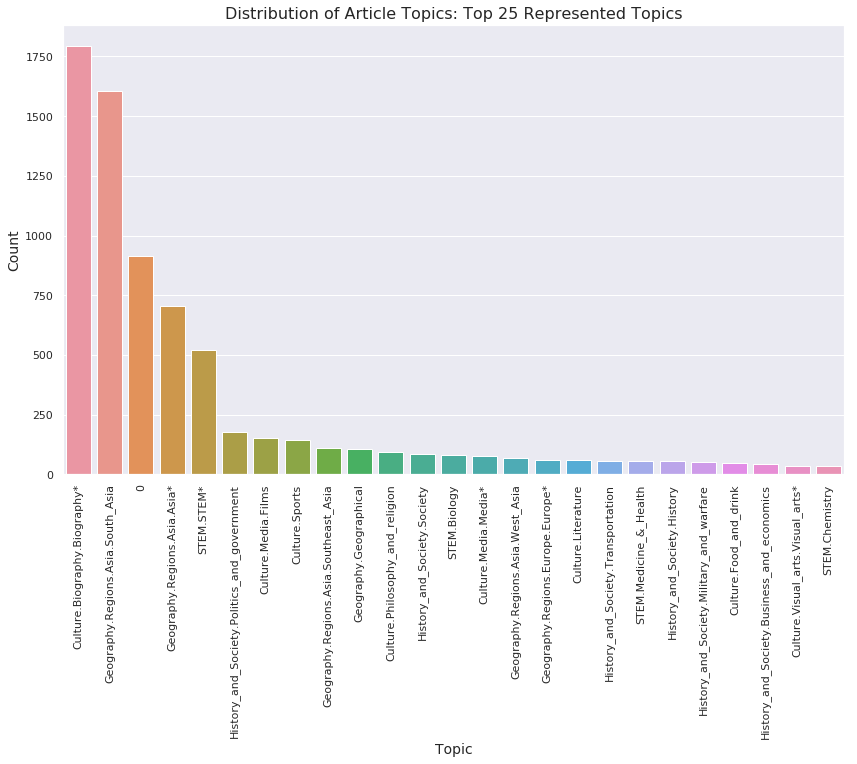

In [38]:
sorted_topic = new_articles['predicted_label_1'].value_counts().head(25).index
sns.set(style='darkgrid')
g = sns.countplot(data=new_articles, x='predicted_label_1', order = sorted_topic, orient='h')
plt.xticks(rotation=90)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Article Topics: Top 25 Represented Topics', fontsize=16)

g.figure.set_figwidth(14)
g.figure.set_figheight(8.27)


#plt.figure(figsize=(15,16))
#plt.rcParams['figure.figsize']=(10,18)
#sns.set(rc={'figure.figsize': (2,6)})
#plt
#figure(num=None, figsize=(1,1), dpi=80, facecolor='w', edgecolor='k');

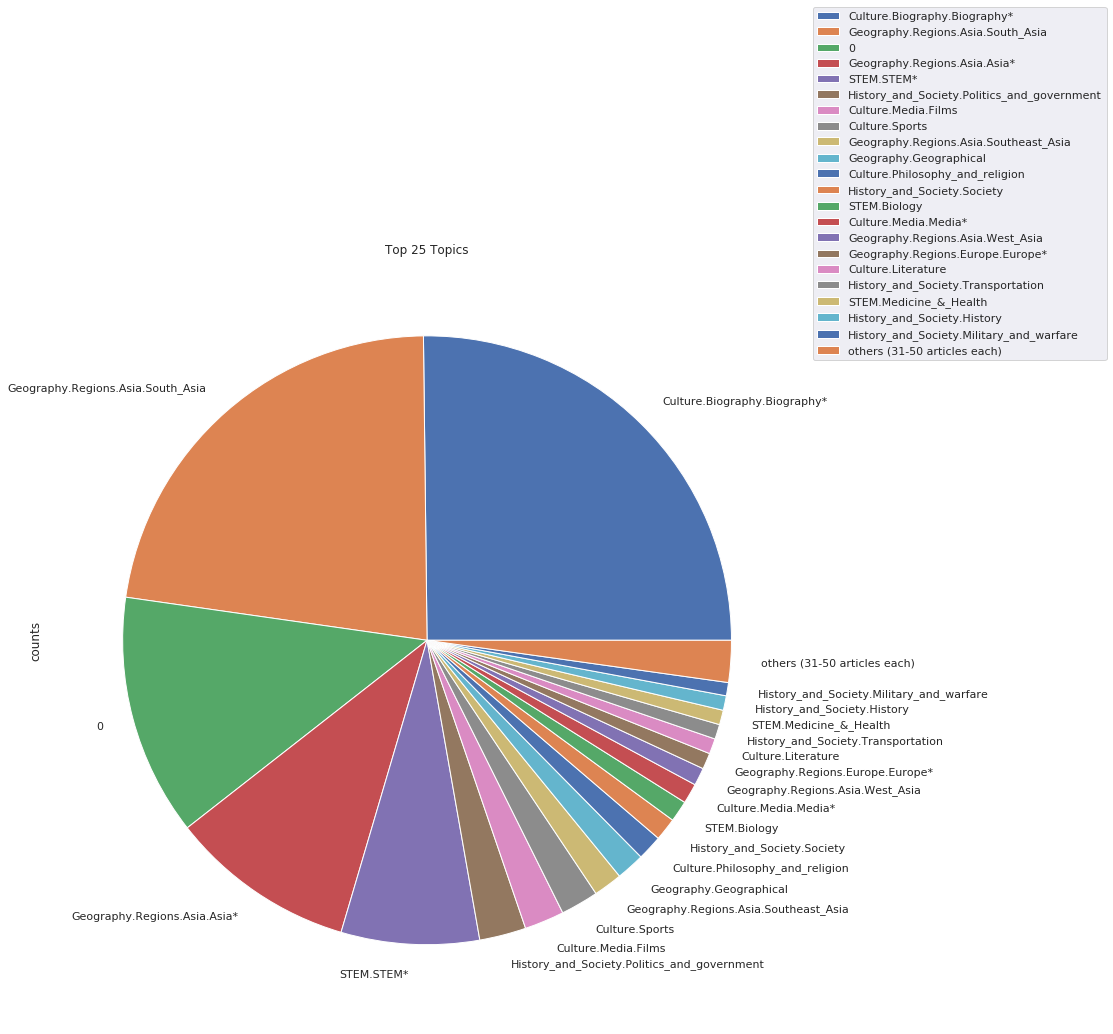

In [105]:
#others
new_row = pd.DataFrame(data = {
    'topics' : ['others (31-50 articles each)'],
    'counts' : [top_25_topics['counts'][21:].sum()]
})

#combining top with others
df2 = pd.concat([top_25_topics[:21], new_row],sort=True)

#plotting -- for comparison left all countries and right 
#the others combined
fig, ax = plt.subplots(figsize = (19,14))

#top_25_topics.plot(kind = 'pie', y = 'counts', labels = top_25_topics['topics'], ax = axes[0])
df2.plot(kind = 'pie', y = 'counts', labels = df2['topics'], ax = ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.1))

#axes[0].set_title('all topics')
ax.set_title('Top 25 Topics')

plt.show()